# Demos: Lecture 8

In [1]:
import pennylane as qml
from pennylane import numpy as np
from lecture08_helpers import *

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
n_samples = 100

X, y = make_blobs(
    n_samples=n_samples, 
    centers=[[0.1, 0.2], [0.25, 0.4]], 
    cluster_std=0.05, 
    n_features=2,
    random_state=6
)

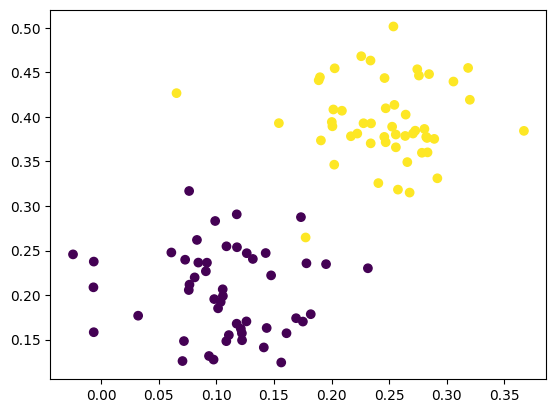

In [3]:
plot_data(X, y)

In [4]:
X = np.array(X, requires_grad=False) # this param is not trainable, don't compute grad
y = np.array(y, requires_grad=False)
y[y == 0] = -1

## Model 1: amplitude embedding

<img src="fig/model1.png" width="500px"> 

In [9]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def model_1(point, weights):
    qml.AmplitudeEmbedding(point, wires=0,normalize=True)
    qml.Rot(*weights,wires=0) # * flattens vector to tuple
    return qml.expval(qml.PauliX(0))

In [10]:
weights = np.random.normal(size=3)

In [19]:
weights

tensor([-0.24191978, -1.37791635,  1.82758277], requires_grad=True)

In [11]:
def loss(weights):
    loss_sum = 0.0
    
    for idx in range(n_samples):
        point = X[idx]
        true_expval = y[idx]
        
        estimated_expval = model_1(point, weights)
        loss_sum += (estimated_expval - true_expval) ** 2
        
    return loss_sum / n_samples

In [12]:
our_preds = make_predictions(X, model_1, weights)

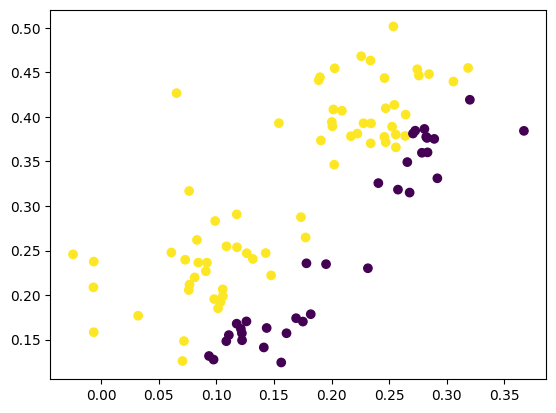

In [13]:
plot_data(X, our_preds)

In [14]:
compute_accuracy(y, our_preds)

0.54

In [15]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

n_its = 100

loss_track = []

for it in range(n_its):
    weights, _loss = opt.step_and_cost(loss, weights)
    if it % 5 == 0:
        our_preds = make_predictions(X, model_1, weights)
        print(f"Loss at iteration {it} = {_loss}  Accuracy = {compute_accuracy(our_preds, y)}")
    loss_track.append(_loss)

Loss at iteration 0 = 1.1490587487210109  Accuracy = 0.5
Loss at iteration 5 = 1.1287687847616565  Accuracy = 0.49
Loss at iteration 10 = 1.109428759397445  Accuracy = 0.48
Loss at iteration 15 = 1.0906936092544384  Accuracy = 0.48
Loss at iteration 20 = 1.0731052282432503  Accuracy = 0.5
Loss at iteration 25 = 1.0571267455200588  Accuracy = 0.5
Loss at iteration 30 = 1.0429831523560944  Accuracy = 0.53
Loss at iteration 35 = 1.030695261567103  Accuracy = 0.53
Loss at iteration 40 = 1.0201533992867748  Accuracy = 0.56
Loss at iteration 45 = 1.01118269573741  Accuracy = 0.57
Loss at iteration 50 = 1.0035874070609154  Accuracy = 0.5
Loss at iteration 55 = 0.9971761099449394  Accuracy = 0.51
Loss at iteration 60 = 0.9917737130306834  Accuracy = 0.56
Loss at iteration 65 = 0.9872257458293929  Accuracy = 0.6
Loss at iteration 70 = 0.9833986622421641  Accuracy = 0.65
Loss at iteration 75 = 0.9801783454972376  Accuracy = 0.64
Loss at iteration 80 = 0.9774679615818194  Accuracy = 0.64
Loss at 

In [16]:
our_preds = make_predictions(X, model_1, weights)

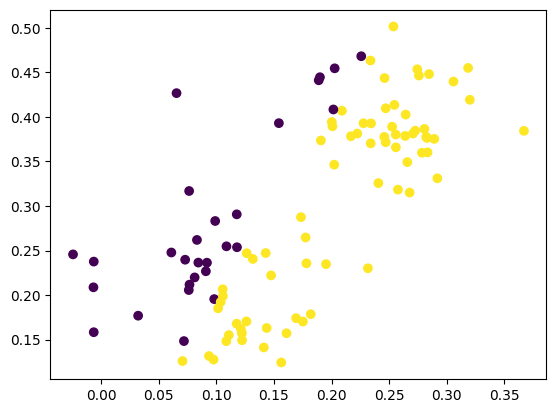

In [17]:
plot_data(X, our_preds)

In [18]:
compute_accuracy(our_preds, y)

0.64

## Model 2: angle embedding

<img src="fig/model2.png" width="500px">

2 wires, 3 gates in Rot for 3 parameters

In [24]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def model_2(point, weights):
    qml.AngleEmbedding(point, wires=[0,1])
    qml.Rot(*weights[0], wires=0)
    qml.Rot(*weights[1], wires=1)
    qml.CNOT(wires=[1,0])
    return qml.expval(qml.PauliX(0))

In [25]:
weights = np.random.normal(size=(2, 3), requires_grad=True)

In [26]:
weights

tensor([[-0.00183945,  1.51153478,  1.04812184],
        [-0.6857092 ,  0.19312669, -0.66544463]], requires_grad=True)

In [27]:
print(qml.draw(model_2, expansion_strategy="device")(X[0], weights))

0: ──RX(0.12)──Rot(-0.00,1.51,1.05)──╭X─┤  <X>
1: ──RX(0.25)──Rot(-0.69,0.19,-0.67)─╰●─┤     


In [28]:
loss = make_loss_function(X, y, model_2)

In [29]:
our_preds = make_predictions(X, model_2, weights)

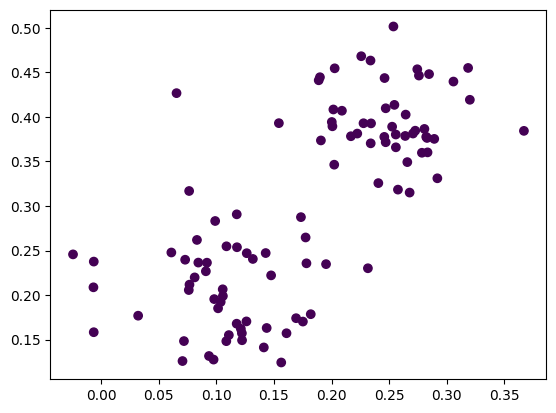

In [30]:
plot_data(X, our_preds)

In [31]:
compute_accuracy(our_preds, y)

0.5

In [32]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

n_its = 100

loss_track = []

for it in range(n_its):
    weights, _loss = opt.step_and_cost(loss, weights)
    if it % 5 == 0:
        our_preds = make_predictions(X, model_2, weights)
        print(f"Loss at iteration {it} = {_loss}  Accuracy = {compute_accuracy(our_preds, y)}")
    loss_track.append(_loss)

Loss at iteration 0 = 1.3084888686950742  Accuracy = 0.5
Loss at iteration 5 = 0.9414073520031967  Accuracy = 0.5
Loss at iteration 10 = 0.8766133601877251  Accuracy = 0.76
Loss at iteration 15 = 0.8699279544171972  Accuracy = 0.89
Loss at iteration 20 = 0.8692887934934161  Accuracy = 0.92
Loss at iteration 25 = 0.8692276989498943  Accuracy = 0.93
Loss at iteration 30 = 0.8692214486584446  Accuracy = 0.94
Loss at iteration 35 = 0.869220445707536  Accuracy = 0.94
Loss at iteration 40 = 0.869219987631948  Accuracy = 0.94
Loss at iteration 45 = 0.869219623593727  Accuracy = 0.94
Loss at iteration 50 = 0.8692193059435641  Accuracy = 0.94
Loss at iteration 55 = 0.8692190257875549  Accuracy = 0.94
Loss at iteration 60 = 0.8692187784142561  Accuracy = 0.94
Loss at iteration 65 = 0.869218559960714  Accuracy = 0.94
Loss at iteration 70 = 0.8692183670437111  Accuracy = 0.94
Loss at iteration 75 = 0.8692181966781161  Accuracy = 0.94
Loss at iteration 80 = 0.8692180462279328  Accuracy = 0.94
Loss 

In [33]:
our_preds = make_predictions(X, model_2, weights)

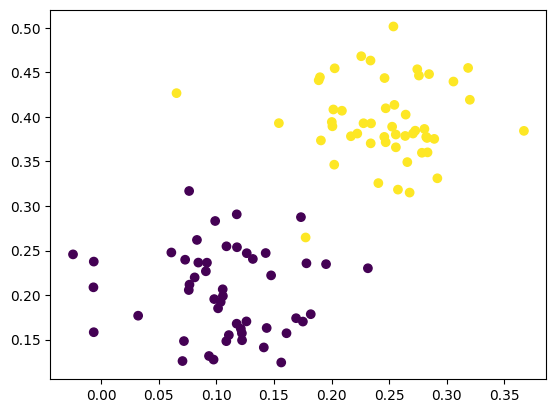

In [34]:
plot_data(X, y)

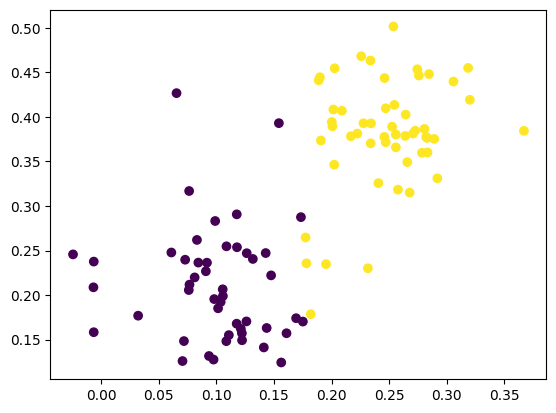

In [35]:
plot_data(X, our_preds)

In [36]:
compute_accuracy(our_preds, y)

0.94